Loan Repayment Prediction using Decision Trees.

Problem Statement: To predict If costumer will repay loan amount or not?

In [92]:
#@title import libraries
import pandas as pd
import numpy as np


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

%matplotlib inline

In [93]:
#@title Load Data

data = pd.read_csv('/content/data.csv', sep=',', header=0)
data.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [94]:
#@title Length & Shape of DataSet

print('Dataset Length:: ', len(data))
print('Dataset Shape:: ', data.shape)

Dataset Length::  1000
Dataset Shape::  (1000, 6)


In [95]:
#@title Data Preperation

data.drop(columns=['sum'], inplace=True)
data['result'] = np.where(data['result'] == "yes", 1, 0)

In [96]:
#@title Seperate Classifier

y = data['result']
X = data.drop('result', axis=1)

X.head()

,initial_payment,last_payment,credit_score,house_number
0,201,10018,250,3046
1,205,10016,395,3044
2,257,10129,109,3251
3,246,10064,324,3137
4,117,10115,496,3094


In [97]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: result, dtype: int64

In [98]:
#@title Splitting data into Train and Test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [99]:
#@title Function to perform training with Entropy

clf_entropy = DecisionTreeClassifier(
    criterion='entropy',
    random_state=100,
    max_depth=3,
    min_samples_leaf=5
  )
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [100]:
#@title Making predictions

y_pred = clf_entropy.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [101]:
#@title Calculating Accuracy Score

score = accuracy_score(y_test, y_pred)
print(f'Accuracy is {score*100:.2f}%')

Accuracy is 93.67%


In [102]:
#@title Decision Tree Visualization - Text

text_representation = tree.export_text(clf_entropy)
print(text_representation)

|--- feature_1 <= 12545.00
|   |--- feature_1 <= 11566.50
|   |   |--- feature_0 <= 485.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  485.50
|   |   |   |--- class: 1
|   |--- feature_1 >  11566.50
|   |   |--- feature_3 <= 4343.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  4343.50
|   |   |   |--- class: 0
|--- feature_1 >  12545.00
|   |--- feature_1 <= 13235.50
|   |   |--- feature_3 <= 3588.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  3588.50
|   |   |   |--- class: 0
|   |--- feature_1 >  13235.50
|   |   |--- feature_0 <= 128.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  128.50
|   |   |   |--- class: 0



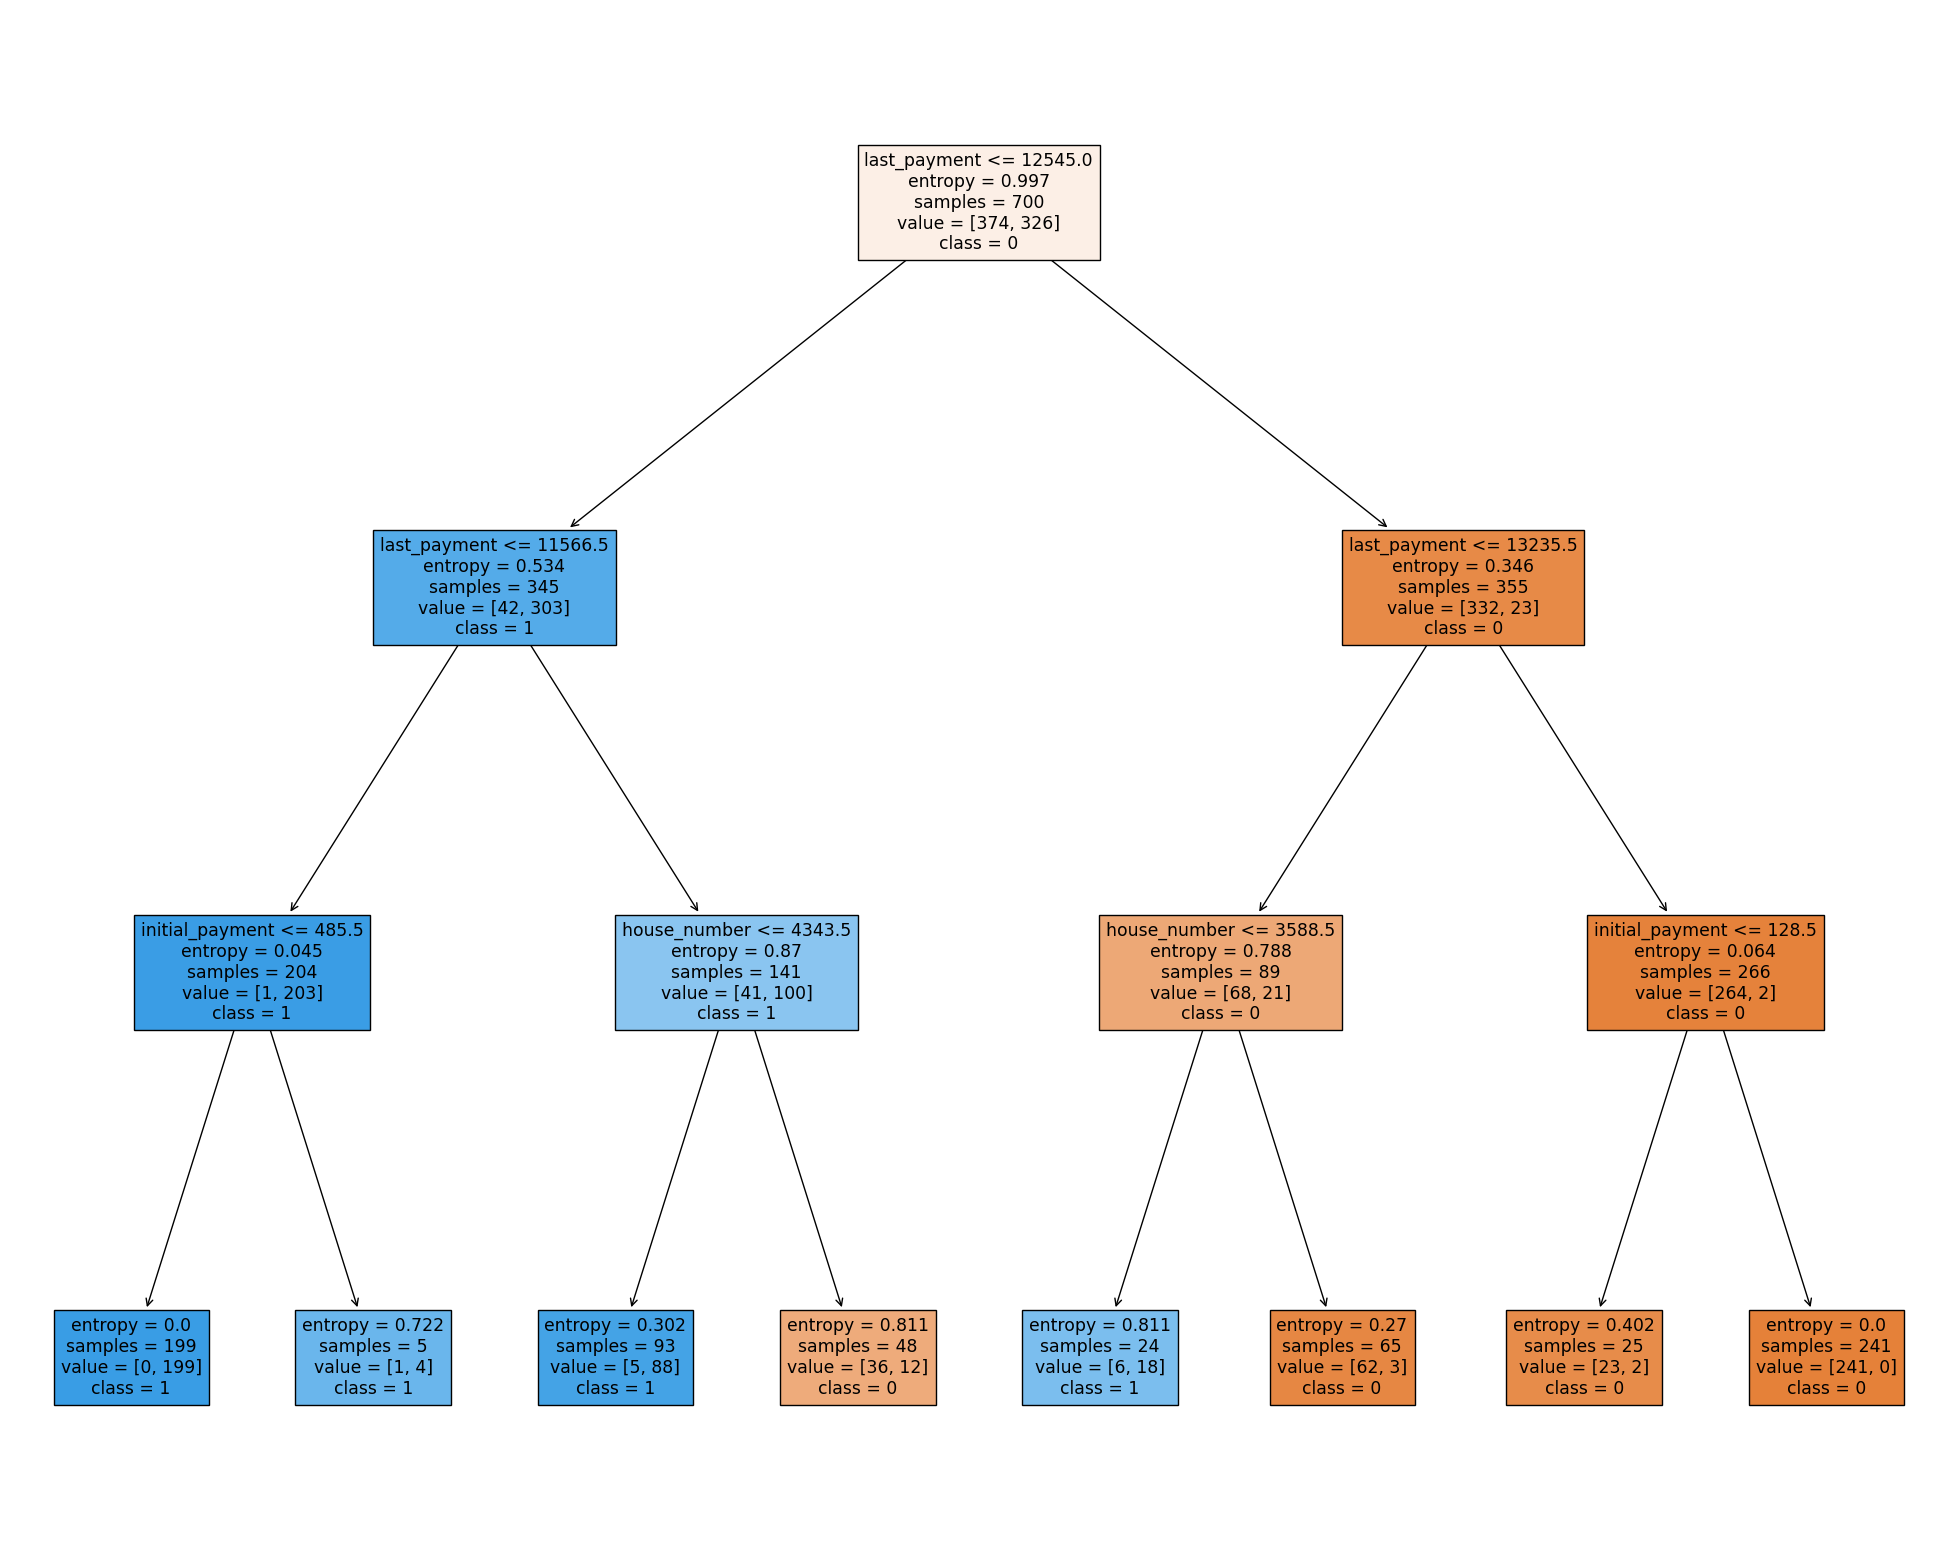

In [103]:
#@title Decision Tree Visualization

fig = plt.figure(figsize=(25, 20))
class_names = [str(label) for label in clf_entropy.classes_]
_ = tree.plot_tree(clf_entropy, feature_names=X.columns, class_names=class_names, filled=True)

In [104]:
#@title Model Evaluation

print(confusion_matrix(y_test, y_pred))

[[134  13]
 [  6 147]]


In [105]:
#@title Make Predictions

client = np.array([[300, 10000, 300, 4000]])
clf_entropy.predict(client)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])